In [2]:
import sys
sys.path.append('../')

import torchvision
import torchvision.transforms as transforms

from cubical.optimization import GridSearch


# 데이터셋을 위한 변환(transform) 정의
transform = transforms.Compose([
    transforms.ToTensor(),
])

# CIFAR-10 훈련 데이터셋 로드
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transform)

#train_dataset = torchvision.datasets.SVHN(root='./data', split='train', 
#                                          transform=transform, download=True)


170499072it [19:36, 144960.89it/s]                                


Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
import torch
images_only_dataset = [image for image, _ in train_dataset]
dataset = torch.stack(images_only_dataset)

In [5]:
# Optimization
best_params, best_entropy = GridSearch(dataset=dataset,
                                       homology_dimension=1,
                                       steps=10).optimize()

TypeError: __cinit__() got an unexpected keyword argument 'vertices'

In [ ]:
print('best_parameters = ', best_params)
print('best entropy = ', best_entropy)

best_parameters =  (0.1111111111111111, 0.0, 1.0)
best entropy =  2.862661625324719


In [ ]:
from cubical.converter import GrayscaleConverter

best_converter = GrayscaleConverter(dataset=dataset, x1=best_params[0], x2=best_params[1], x3=best_params[2])
converted_dataset = best_converter.convert_dataset()

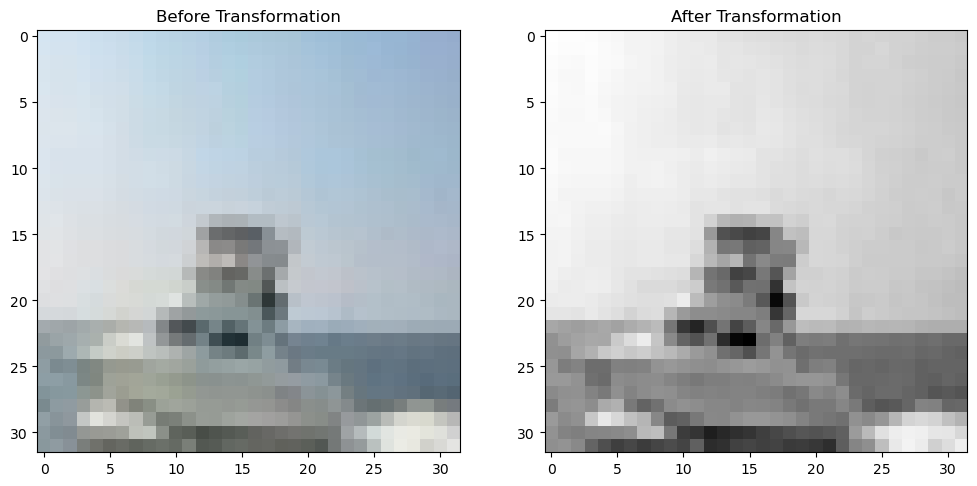

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(before, after):
    # 변환 전 이미지: PyTorch 텐서에서 NumPy 배열로 변환
    before_np = before.numpy()
    before_np = np.transpose(before_np, (1, 2, 0))  # [채널, 높이, 너비] -> [높이, 너비, 채널]

    # 변환 후 이미지: PyTorch 텐서에서 NumPy 배열로 변환
    after_np = after.numpy()
    after_np = np.transpose(after_np, (1, 2, 0))  # [채널, 높이, 너비] -> [높이, 너비, 채널]

    # 이미지 시각화
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(before_np)
    plt.title("Before Transformation")

    plt.subplot(1, 2, 2)
    plt.imshow(after_np.squeeze(), cmap='gray')  # 그레이스케일 이미지는 채널을 제거
    plt.title("After Transformation")

    plt.show()

# 이미지 샘플 가져오기 (예시)
before_sample = dataset[100]
after_sample = converted_dataset[100]

# 시각화 함수 호출
show_images(before_sample, after_sample)

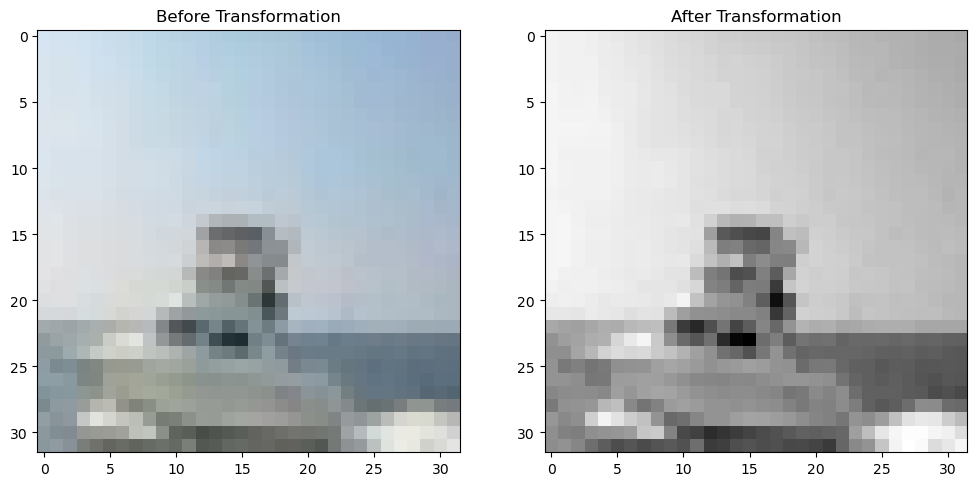

In [ ]:
comparision = GrayscaleConverter(dataset=dataset)
compare = comparision.convert(dataset[100])
show_images(before_sample, compare)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

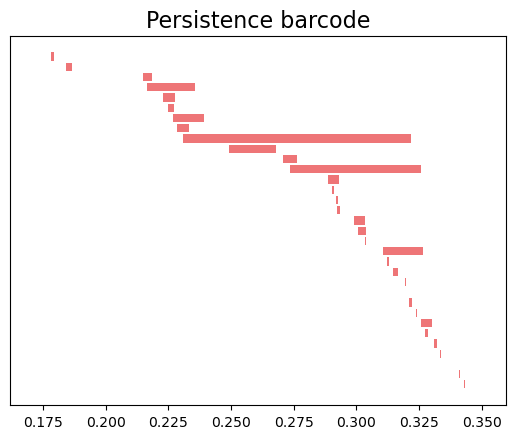

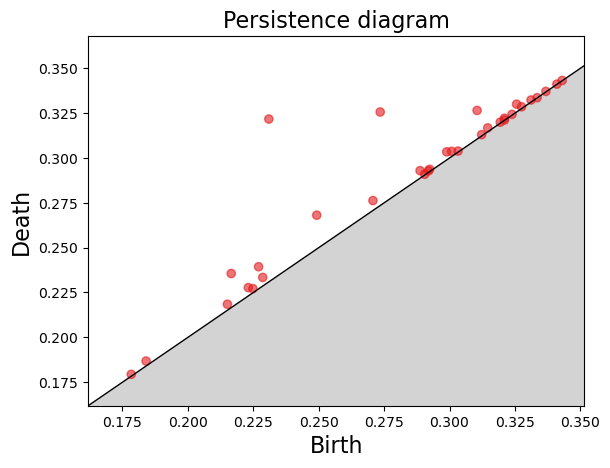

In [ ]:
from gudhi.persistence_graphical_tools import plot_persistence_barcode, plot_persistence_diagram
from cubical.entropy_calculator import calculate_PD_for_dim


plot_persistence_barcode(calculate_PD_for_dim(after_sample, 1)[0])
plot_persistence_diagram(calculate_PD_for_dim(after_sample, 1)[0])

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

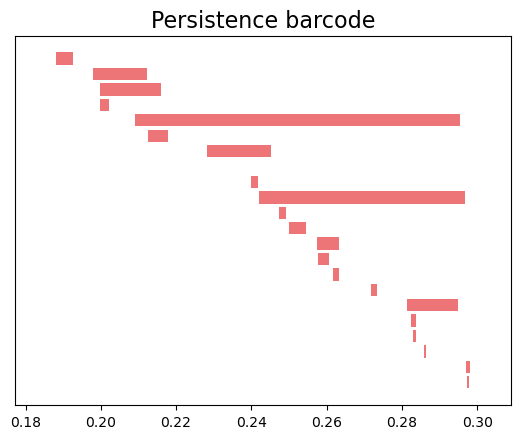

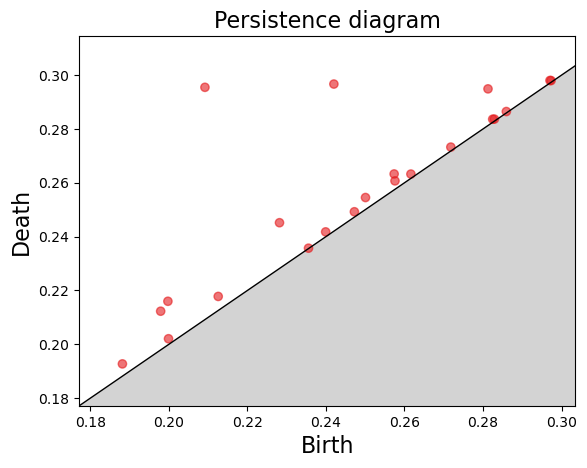

In [ ]:
plot_persistence_barcode(calculate_PD_for_dim(compare, 1)[0])
plot_persistence_diagram(calculate_PD_for_dim(compare, 1)[0])